В таблице приведены данные зависимости потребления Y (усл. ед.) от дохода X (усл. ед.) для некоторых домашних хозяйств.
1. В предположении, что между Y и X существует линейная зависимость, найдите точечные оценки коэффициентов линейной регрессии.
2. В предположении нормальности случайной составляющей регрессионной модели проверьте гипотезу об отсутствии линейной зависимости между Y и X .
3. Каково ожидаемое потребление Y0 домашнего хозяйства с доходом  X0 = 7 усл. ед.? Найдите доверительный интервал для прогноза.
Дайте интерпретацию полученных результатов. Уровень значимости считать равным α = 0,05. 
X	2.2	    2.8	    3.0	    3.5	    3.9	    4.2	    4.4	    4.8	    5.1	    5.5
Y	0.13	0.21	0.28	0.26	0.23	0.29	0.28	0.24	0.31	0.33

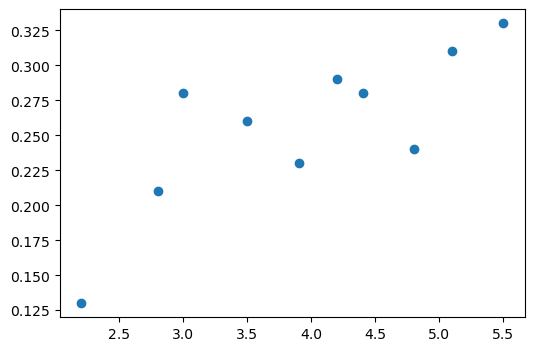

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

x = np.array([2.2, 2.8, 3.0, 3.5, 3.9, 4.2, 4.4, 4.8, 5.1, 5.5])
y = np.array([0.13, 0.21, 0.28, 0.26, 0.23, 0.29, 0.28, 0.24, 0.31, 0.33])
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(x, y)
plt.show()

In [3]:
# Расчет корреляции
alpha = 0.05
r, p_value = stats.pearsonr(x, y)
print(f'Коэффициент корреляции = {r}, p_value = {p_value}')
if p_value < alpha:
    print("Связь статистически значима")
else:
    print("Нельзя отклонить нулевую гипотезу")
# существует линейная зависимость между доходами и объемом потребления, коэффициент корреляции статистически значим

Коэффициент корреляции = 0.786614939767121, p_value = 0.006948144252595511
Связь статистически значима


In [5]:
# расчет линейной регрессии
res = stats.linregress(x, y)
print(f'Коэффициент наклона {res.slope}, сдвиг {res.intercept}')
print(f'Коэффициент корреляции {res.rvalue}, коэффициент детерминации {res.rvalue**2}, p-value (из теста Вальда в предположении, что наклон равен нулю) {res.pvalue}')
print(f'Ошибка наклона {res.stderr}, ошибка сдвига {res.intercept_stderr}')
print(f' Y = {round(res.intercept, 3)} + {round(res.slope, 3)}*X')

Коэффициент наклона 0.04239513916111329, сдвиг 0.08896315170521366
Коэффициент корреляции 0.7866149397671212, коэффициент детерминации 0.6187630634648317, p-value (из теста Вальда в предположении, что наклон равен нулю) 0.006948144252595514
Ошибка наклона 0.01176539105520797, ошибка сдвига 0.04785492362366148
 Y = 0.089 + 0.042*X


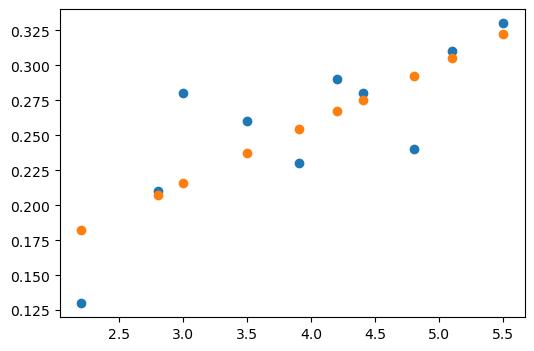

In [11]:
# визуализация прогноза
y_pred = res.intercept + res.slope*x
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(x, y)
ax.scatter(x, y_pred)
plt.show()

In [13]:
# расчет доверительных интервалов для параметров и прогноза
from scipy.stats import t
t_coef = abs(t.ppf(alpha/2, len(x)-2))
t_real = abs(t.ppf(res.pvalue/2, len(x)-2))
print(f'Расчетное значение t-критерия: {t_real}, критическое значение t-критерия: {t_coef}')
print(f"slope (95%): {res.slope:.3f} +/- {t_coef*res.stderr:.3f}")
print(f"intercept (95%): {res.intercept:.3f} +/- {t_coef*res.intercept_stderr:.3f}")

x_0 = 7
y_0 = res.intercept + res.slope*x_0
y_r = (y_pred-y)**2
s_r = (y_r.sum()/(len(x)-2))**0.5
delta = s_r*(1+1/len(x)+(x_0-x.mean())**2/(len(x)*x.var()))
print(f"При х_0 = 7: у_0 = {y_0:.3f} +/- {t_coef*delta:.3f}")

Расчетное значение t-критерия: 3.6033769691273525, критическое значение t-критерия: 2.3060041352041662
slope (95%): 0.042 +/- 0.027
intercept (95%): 0.089 +/- 0.110
При х_0 = 7: у_0 = 0.386 +/- 0.175


Вычислить коэффициент уравнения регрессии. Определить выборочный коэффициент корреляции между плотностью X древесины маньчжурского ясеня (кг/м3) и его прочностью Y (МПа).

X	0.69	0.68	0.65	0.74	0.72	0.66	0.72	0.72	0.72	0.75	0.76	0.62	0.69	0.72	0.66	0.69	0.65	0.68	0.71	0.67
Y	53.9	48.9	46.8	52.2	53.5	48.7	49.2	53.7	53.2	57.6	58.3	45.7	49.6	49.4	49.5	51.7	43.6	51.5	46.6	48



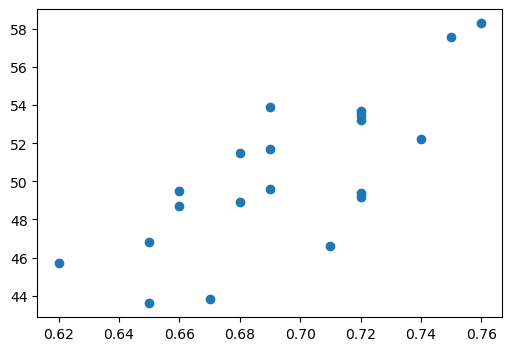

In [15]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

x = np.array([0.69, 0.68, 0.65, 0.74, 0.72, 0.66, 0.72, 0.72, 0.72, 0.75, 0.76, 0.62, 0.69, 0.72, 0.66, 0.69, 0.65, 0.68, 0.71, 0.67])
y = np.array([53.9, 48.9, 46.8, 52.2, 53.5, 48.7, 49.2, 53.7, 53.2, 57.6, 58.3, 45.7, 49.6, 49.4, 49.5, 51.7, 43.6, 51.5, 46.6, 43.8])
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(x, y)
plt.show()

In [17]:
# Расчет корреляции
alpha = 0.05
r, p_value = stats.pearsonr(x, y)
print(f'Коэффициент корреляции = {r}, p_value = {p_value}')
if p_value < alpha:
    print("Связь статистически значима")
else:
    print("Нельзя отклонить нулевую гипотезу")
# существует линейная зависимость между плотностью дерева и его прочностью, коэффициент корреляции статистически значим

Коэффициент корреляции = 0.7670657980868435, p_value = 7.937216045145589e-05
Связь статистически значима


In [19]:
# расчет линейной регрессии
res = stats.linregress(x, y)
print(f'Коэффициент наклона {res.slope}, сдвиг {res.intercept}')
print(f'Коэффициент корреляции {res.rvalue}, коэффициент детерминации {res.rvalue**2}, p-value (из теста Вальда в предположении, что наклон равен нулю) {res.pvalue}')
print(f'Ошибка наклона {res.stderr}, ошибка сдвига {res.intercept_stderr}')
print(f' Y = {round(res.intercept, 3)} + {round(res.slope, 3)}*X')

Коэффициент наклона 83.82239382239386, сдвиг -7.886563706563734
Коэффициент корреляции 0.7670657980868436, коэффициент детерминации 0.5883899385946063, p-value (из теста Вальда в предположении, что наклон равен нулю) 7.937216045145513e-05
Ошибка наклона 16.524722648997905, ошибка сдвига 11.500067271189842
 Y = -7.887 + 83.822*X


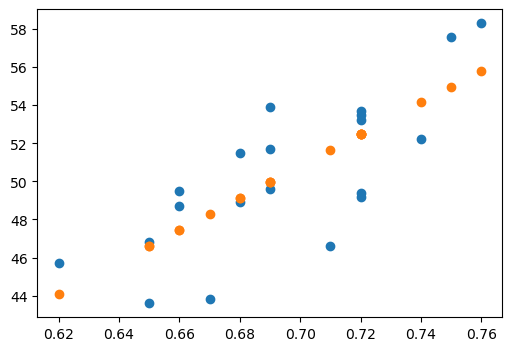

In [21]:
# визуализация прогноза
y_pred = res.intercept + res.slope*x
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(x, y)
ax.scatter(x, y_pred)
plt.show()

In [23]:
# расчет доверительных интервалов для параметров и прогноза
from scipy.stats import t
t_coef = abs(t.ppf(alpha/2, len(x)-2))
t_real = abs(t.ppf(res.pvalue/2, len(x)-2))
print(f'Расчетное значение t-критерия: {t_real}, критическое значение t-критерия: {t_coef}')
print(f"slope (95%): {res.slope:.3f} +/- {t_coef*res.stderr:.3f}")
print(f"intercept (95%): {res.intercept:.3f} +/- {t_coef*res.intercept_stderr:.3f}")

Расчетное значение t-критерия: 5.072544671572912, критическое значение t-критерия: 2.10092204024096
slope (95%): 83.822 +/- 34.717
intercept (95%): -7.887 +/- 24.161


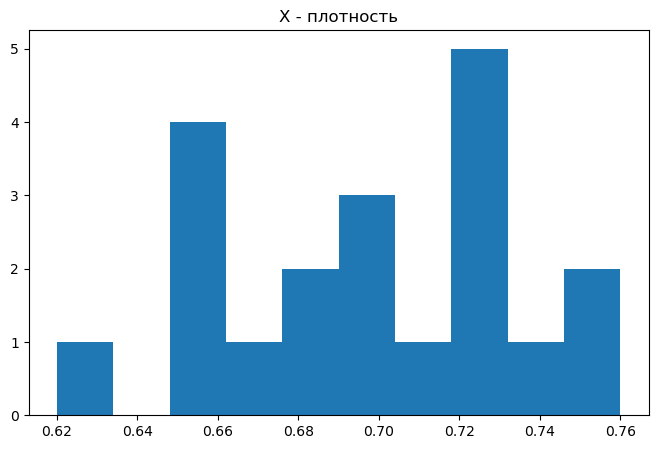

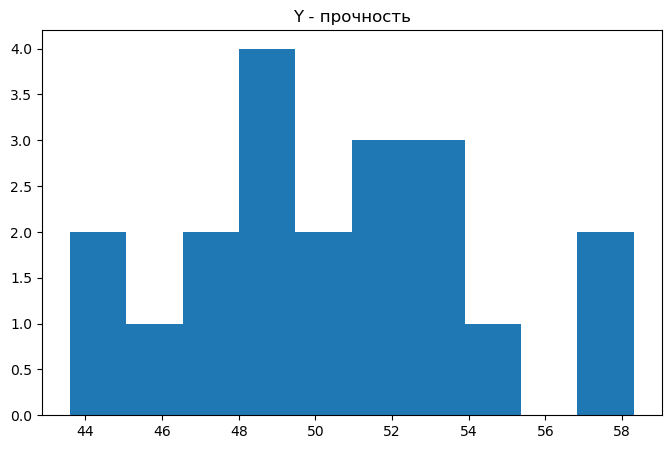

In [25]:
fig = plt.figure(figsize =(8, 5))
plt.hist(x)
plt.title('X - плотность')
plt.show()
fig = plt.figure(figsize =(8, 5))
plt.hist(y)
plt.title('Y - прочность')
plt.show()

In [29]:
# тест Шапиро-Уилка на нормальность данных
from scipy import stats
stats_x, p_value_x = stats.shapiro(x)
stats_y, p_value_y = stats.shapiro(y)
print(f'Для х: статистика = {stats_x}, p-value = {p_value_x}')
print(f'Для y: статистика = {stats_y}, p-value = {p_value_y}')

# Принятие решения на основе p-значения
if p_value_x < alpha:
    print("Выборка X не нормальна")
else:
    print("Нельзя отклонить нулевую гипотезу о нормальности для Х")
if p_value_y < alpha:
    print("Выборка Y не нормальна")
else:
    print("Нельзя отклонить нулевую гипотезу о нормальности для Y")

Для х: статистика = 0.9700703790322373, p-value = 0.7563602402867455
Для y: статистика = 0.9686223823760902, p-value = 0.7255555258233796
Нельзя отклонить нулевую гипотезу о нормальности для Х
Нельзя отклонить нулевую гипотезу о нормальности для Y


In [27]:
# тест Дурбина-Уотсона на отсутствие независимости остатков
from statsmodels.stats.stattools import durbin_watson
y_r = (y-y_pred)
dw = durbin_watson(y_r)
print(dw)

1.734493587514311


F-статистика = 2.167957167332101, p-value = 0.1472428762897866
Нельзя отклонить нулевую гипотезу о гомоскедастичности данных


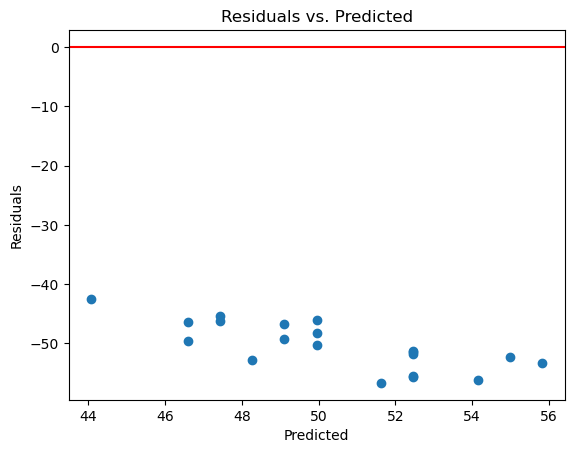

In [31]:
# тест Гольдфельда-Квандта на гетероскедастичность
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_goldfeldquandt

alpha = 0.05
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
gq_test = het_goldfeldquandt(y, x)
print(f'F-статистика = {gq_test[0]}, p-value = {gq_test[1]}')
# Принятие решения на основе p-значения
if gq_test[1] < alpha:
    print("Присутствует гетероскедастичность")
else:
    print("Нельзя отклонить нулевую гипотезу о гомоскедастичности данных")

# визуализация остатков
import matplotlib.pyplot as plt
import numpy as np

# Calculate the residuals
y_prog = model.predict(x)
y_resud = model.resid - y_prog

# Create a scatter plot
plt.scatter(y_prog, y_resud)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residuals vs. Predicted')
plt.show()

Пусть имеются следующие данные (условные) о сменной добыче угля на одного рабочего y (т), мощности пласта x1 (м) и уровне механизации работ х2 (%), характеризующие процесс добычи угля в 10 шахтах. Требуется построить уравнение множественной регрессии и исследовать его.
x1	8	11	12	9	8	8	9	9	8	12
x2	5	8	8	5	7	8	6	4	5	7
y	5	10	10	7	5	6	6	5		8


In [33]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd

x1 = np.array([8, 11, 12, 9, 8, 8, 9, 9, 8, 12])
x2 = np.array([5, 8, 8, 5, 7, 8, 6, 4, 5, 7])
y = np.array([5, 10, 10, 7, 5, 6, 6, 5, 6, 8])

df = pd.DataFrame()
df['x1']=x1
df['x2']=x2
df['y']=y

df.corr()

,x1,x2,y
x1,1.000000,0.487675,0.866138
x2,0.487675,1.000000,0.638764
y,0.866138,0.638764,1.000000


In [35]:
# решение через statsmodels
import statsmodels.api as sm
import numpy as np
y = [5, 10, 10, 7, 5, 6, 6, 5, 6, 8]
x = [
    [8, 11, 12, 9, 8, 8, 9, 9, 8, 12],
    [5, 8, 8, 5, 7, 8, 6, 4, 5, 7],
]
def reg_m(y, x):
    ones = np.ones(len(x[0]))
    X = sm.add_constant(np.column_stack((x[0], ones)))
    for ele in x[1:]:
        X = sm.add_constant(np.column_stack((ele, X)))
    results = sm.OLS(y, X).fit()
    return results
print(reg_m(y, x).summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     15.08
Date:                Thu, 21 Nov 2024   Prob (F-statistic):            0.00290
Time:                        20:05:41   Log-Likelihood:                -11.903
No. Observations:                  10   AIC:                             29.81
Df Residuals:                       7   BIC:                             30.71
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3670      0.243      1.511      0.1

D:\anaconda\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


'''
Характеристика уравнения как целого:
1. R-squared (R-квадрат) - индекс (коэффициент) детерминации (множественной корреляции)
2. Adj. R-squared (скорректированный R-квадрат) - индекс (коэффициент) детерминации (множественной корреляции), скорректированный (нормированный) на число степеней свободы остатков
3. F-statistic - F-критерий Фишера для оценки значимости уравнения множественной регрессии в целом
4. Prob (F-statistic) - значение уровня значимости, соответствующее вычисленной величине F-критерия, если он меньше уровня значимости, то построенная регрессия является значимой

Характеристика коэффициентов регрессии:
1. coef - значение коэффициента
2. std err - стандартное отклонение коэффициента
3. t - t-критерий Стьюдента для оценки статистической значимости параметра
4. P>|t| - вероятности событий непревышения расчетной статистикой Стьюдента для соответствующего параметра регрессии табличного значения, если она меньше уровня значимости, то принимается гипотеза о значимости соответствующего коэффициента регрессии
'''

In [39]:
# решение через numpy.linalg.lstsq
import numpy as np
y = [5, 10, 10, 7, 5, 6, 6, 5, 6, 8]
x = [
    [8, 11, 12, 9, 8, 8, 9, 9, 8, 12],
    [5, 8, 8, 5, 7, 8, 6, 4, 5, 7],
]
x = np.transpose(x)  # transpose so input vectors
x = np.c_[x, np.ones(x.shape[0])]  # add bias term
linreg = np.linalg.lstsq(x, y, rcond=None)[0]
print(linreg) # Оптимальные значения параметров

[ 0.85393258  0.3670412  -3.53932584]


In [45]:
# решение через scipy.curve_fit()
from scipy.optimize import curve_fit
import scipy
import numpy as np
def function_calc(x, a, b, c):
    return a + b * x[0] + c * x[1]
y = [5, 10, 10, 7, 5, 6, 6, 5, 6, 8]
x = [
    [8, 11, 12, 9, 8, 8, 9, 9, 8, 12],
    [5, 8, 8, 5, 7, 8, 6, 4, 5, 7],
]
popt, pcov = curve_fit(function_calc, x, y)
print(popt) # Оптимальные значения параметров
print(pcov) # Расчетная приблизительная ковариация параметров. Диагонали показывают дисперсию оценки параметра.
print(np.sqrt(np.diag(pcov))) # стандартные отклонения параметров

[-3.53932584  0.85393258  0.3670412 ]
[[ 3.63504995 -0.29245859 -0.12627246]
 [-0.29245859  0.04862215 -0.02612533]
 [-0.12627246 -0.02612533  0.0590239 ]]
[1.90658069 0.2205043  0.24294836]


In [94]:
# расчет стандартных коэффициентов регрессии
x1 = np.array([8, 11, 12, 9, 8, 8, 9, 9, 8, 12])
x2 = np.array([5, 8, 8, 5, 7, 8, 6, 4, 5, 7])
y = np.array([5, 10, 10, 7, 5, 6, 6, 5, 6, 8])
x1 = (x1-x1.mean())/(x1.var()**0.5)
x2 = (x2-x2.mean())/(x2.var()**0.5)
y = (y-y.mean())/(y.var()**0.5)
x = [x1, x2]
def reg_m(y, x):
    ones = np.ones(len(x[0]))
    X = sm.add_constant(np.column_stack((x[0], ones)))
    for ele in x[1:]:
        X = sm.add_constant(np.column_stack((ele, X)))
    results = sm.OLS(y, X).fit()
    return results
print(reg_m(y, x).summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     15.08
Date:                Tue, 19 Nov 2024   Prob (F-statistic):            0.00290
Time:                        17:35:13   Log-Likelihood:                -5.8429
No. Observations:                  10   AIC:                             17.69
Df Residuals:                       7   BIC:                             18.59
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.2839      0.188      1.511      0.1

D:\anaconda\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


Для набора данных предложите вид зависимости Y(X)
X = [46, 51, 61, 59, 48, 50, 47, 52, 43, 50, 51, 48, 45, 47, 54, 42, 54, 51, 55, 49]
Y = [517, 553, 554, 631, 436, 487, 480, 582, 383, 487, 553, 436, 504, 480, 509, 368, 509, 553, 493, 435]

Нельзя отклонить нулевую гипотезу о нормальности для Х
Нельзя отклонить нулевую гипотезу о нормальности для Y
Нельзя отклонить нулевую гипотезу о гомоскедастичности данных


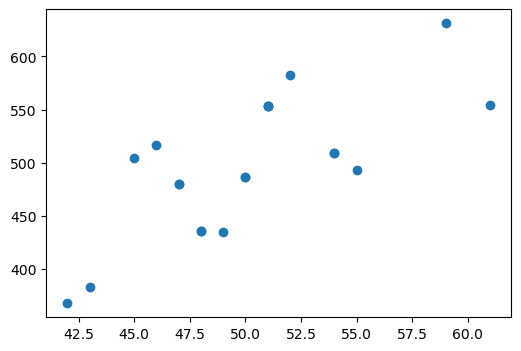

Коэффициент наклона 9.782779084089128, сдвиг 6.893628932930255
Коэффициент корреляции 0.7295829530452735, коэффициент детерминации 0.5322912853742618
p-value (из теста Вальда в предположении, что наклон равен нулю) 0.0002615156106691978
Ошибка наклона 2.1614194079923217, ошибка сдвига 108.8752676354131
 Y = 6.894 + 9.783*X


In [47]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

x = np.array([46, 51, 61, 59, 48, 50, 47, 52, 43, 50, 51, 48, 45, 47, 54, 42, 54, 51, 55, 49])
y = np.array([517, 553, 554, 631, 436, 487, 480, 582, 383, 487, 553, 436, 504, 480, 509, 368, 509, 553, 493, 435])
alpha = 0.05

# тест Шапиро-Уилка на нормальность данных
stats_x, p_value_x = stats.shapiro(x)
stats_y, p_value_y = stats.shapiro(y)
if p_value_x < alpha:
    print("Выборка X не нормальна")
else:
    print("Нельзя отклонить нулевую гипотезу о нормальности для Х")
if p_value_y < alpha:
    print("Выборка Y не нормальна")
else:
    print("Нельзя отклонить нулевую гипотезу о нормальности для Y")

# тест Гольдфельда-Квандта на гетероскедастичность
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_goldfeldquandt
alpha = 0.05
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
gq_test = het_goldfeldquandt(y, x)
# Принятие решения на основе p-значения
if gq_test[1] < alpha:
    print("Присутствует гетероскедастичность")
else:
    print("Нельзя отклонить нулевую гипотезу о гомоскедастичности данных")

# визуализация 
fig, ax = plt.subplots(figsize=(6, 4))
x = np.array([46, 51, 61, 59, 48, 50, 47, 52, 43, 50, 51, 48, 45, 47, 54, 42, 54, 51, 55, 49])
y = np.array([517, 553, 554, 631, 436, 487, 480, 582, 383, 487, 553, 436, 504, 480, 509, 368, 509, 553, 493, 435])
ax.scatter(x, y)
plt.show()

# предположение о линейной регрессии
res = stats.linregress(x, y)
print(f'Коэффициент наклона {res.slope}, сдвиг {res.intercept}')
print(f'Коэффициент корреляции {res.rvalue}, коэффициент детерминации {res.rvalue**2}')
print(f'p-value (из теста Вальда в предположении, что наклон равен нулю) {res.pvalue}')
print(f'Ошибка наклона {res.stderr}, ошибка сдвига {res.intercept_stderr}')
print(f' Y = {round(res.intercept, 3)} + {round(res.slope, 3)}*X')

In [49]:
import statsmodels.api as sm
import numpy as np
y = np.array([517, 553, 554, 631, 436, 487, 480, 582, 383, 487, 553, 436, 504, 480, 509, 368, 509, 553, 493, 435])
x = [[46, 51, 61, 59, 48, 50, 47, 52, 43, 50, 51, 48, 45, 47, 54, 42, 54, 51, 55, 49]]
def reg_m(y, x):
    ones = np.ones(len(x[0]))
    X = sm.add_constant(np.column_stack((x[0], ones)))
    for ele in x[1:]:
        X = sm.add_constant(np.column_stack((ele, X)))
    results = sm.OLS(y, X).fit()
    return results
print(reg_m(y, x).summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     20.49
Date:                Thu, 21 Nov 2024   Prob (F-statistic):           0.000262
Time:                        20:33:12   Log-Likelihood:                -103.76
No. Observations:                  20   AIC:                             211.5
Df Residuals:                      18   BIC:                             213.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             9.7828      2.161      4.526      0.0

In [71]:
import statsmodels.api as sm
import numpy as np
y = np.array([517, 553, 554, 631, 436, 487, 480, 582, 383, 487, 553, 436, 504, 480, 509, 368, 509, 553, 493, 435])
marks = np.array([46, 51, 61, 59, 48, 50, 47, 52, 43, 50, 51, 48, 45, 47, 54, 42, 54, 51, 55, 49])
x2 = np.sin(x1)
x3 = np.log(x1)
x = [marks, x2, x3]
def reg_m(y, x):
    ones = np.ones(len(x[0]))
    X = sm.add_constant(np.column_stack((x[0], ones)))
    for ele in x[1:]:
        X = sm.add_constant(np.column_stack((ele, X)))
    results = sm.OLS(y, X).fit()
    return results
print(reg_m(y, x).summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.538e+05
Date:                Thu, 21 Nov 2024   Prob (F-statistic):           8.89e-39
Time:                        20:41:43   Log-Likelihood:               -0.32851
No. Observations:                  20   AIC:                             8.657
Df Residuals:                      16   BIC:                             12.64
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           -10.6639     11.394     -0.936      0.3